In [3]:
import pandas as pd

# Load the datasets to examine their structure
dataset1_path = "/home/ai23mtech14004/CS5803_NLP/MTS-Dialog/Main-Dataset/MTS-Dialog-TestSet-1-MEDIQA-Chat-2023.csv"
dataset2_path = "/home/ai23mtech14004/CS5803_NLP/MTS-Dialog/Main-Dataset/MTS-Dialog-TestSet-2-MEDIQA-Sum-2023.csv"
training_set_path = "/home/ai23mtech14004/CS5803_NLP/MTS-Dialog/Main-Dataset/MTS-Dialog-TrainingSet.csv"
validation_set_path = "/home/ai23mtech14004/CS5803_NLP/MTS-Dialog/Main-Dataset/MTS-Dialog-ValidationSet.csv"

# Load the datasets
dataset1 = pd.read_csv(dataset1_path)
dataset2 = pd.read_csv(dataset2_path)
training_set = pd.read_csv(training_set_path)
validation_set = pd.read_csv(validation_set_path)

# Display the first few rows and the structure of each dataset
dataset1.head(), dataset2.head(), training_set.head(), validation_set.head()


(   ID section_header                                       section_text  \
 0   0          GENHX  The patient is a 55-year-old African-American ...   
 1   1      FAM/SOCHX               Positive for stroke and sleep apnea.   
 2   2            ROS  MSK: Negative myalgia, negative joint pain, ne...   
 3   3      FAM/SOCHX                                   Noncontributory.   
 4   4      FAM/SOCHX  Father died of a thoracic aortic aneurysm, age...   
 
                                             dialogue  
 0  Doctor: Good afternoon, sir. Did you just have...  
 1  Doctor: Any medical issues running in your fam...  
 2  Doctor: Any pain in your muscles? \nPatient: N...  
 3  Doctor: Anyone in family with any blood or hea...  
 4  Doctor: Can you tell me about your family? Did...  ,
    ID section_header                                       section_text  \
 0   0             CC                              Congestion and cough.   
 1   1      FAM/SOCHX  At home lives mom, dad, a 2-1/

preprocess

In [4]:
# Preprocessing the dialogue text to remove unwanted characters and simplify the text for model training

def preprocess_text(df):
    # Simplify whitespace and strip leading/trailing whitespace
    df['dialogue'] = df['dialogue'].str.replace(r'\s+', ' ', regex=True).str.strip()
    # Remove non-standard quotes and other special characters
    df['dialogue'] = df['dialogue'].str.replace(r"[\“\”\‘\’]", "'", regex=True)
    return df

# Preprocess each dataset
dataset1_preprocessed = preprocess_text(dataset1)
dataset2_preprocessed = preprocess_text(dataset2)
training_set_preprocessed = preprocess_text(training_set)
validation_set_preprocessed = preprocess_text(validation_set)

# Display the first few rows of the preprocessed training set to verify changes
training_set_preprocessed.head()


,ID,section_header,section_text,dialogue
0,0,GENHX,The patient is a 76-year-old white female who ...,Doctor: What brings you back into the clinic t...
1,1,GENHX,The patient is a 25-year-old right-handed Cauc...,Doctor: How're you feeling today? Patient: Ter...
2,2,GENHX,"This is a 22-year-old female, who presented to...","Doctor: Hello, miss. What is the reason for yo..."
3,3,MEDICATIONS,Prescribed medications were Salmeterol inhaler...,Doctor: Are you taking any over the counter me...
4,4,CC,"Burn, right arm.","Doctor: Hi, how are you? Patient: I burned my ..."


In [5]:
# Splitting the dialogues into individual exchanges for a more detailed empathy analysis

def split_dialogues(df):
    # Split each dialogue into exchanges based on the pattern of switching speakers
    df['exchanges'] = df['dialogue'].apply(lambda x: x.split('\n'))
    return df

# Apply the function to preprocess and split dialogues
dataset1_exchanges = split_dialogues(dataset1_preprocessed)
dataset2_exchanges = split_dialogues(dataset2_preprocessed)
training_set_exchanges = split_dialogues(training_set_preprocessed)
validation_set_exchanges = split_dialogues(validation_set_preprocessed)

# Display the first few rows of the training set to verify the changes
training_set_exchanges.head()


,ID,section_header,section_text,dialogue,exchanges
0,0,GENHX,The patient is a 76-year-old white female who ...,Doctor: What brings you back into the clinic t...,[Doctor: What brings you back into the clinic ...
1,1,GENHX,The patient is a 25-year-old right-handed Cauc...,Doctor: How're you feeling today? Patient: Ter...,[Doctor: How're you feeling today? Patient: Te...
2,2,GENHX,"This is a 22-year-old female, who presented to...","Doctor: Hello, miss. What is the reason for yo...","[Doctor: Hello, miss. What is the reason for y..."
3,3,MEDICATIONS,Prescribed medications were Salmeterol inhaler...,Doctor: Are you taking any over the counter me...,[Doctor: Are you taking any over the counter m...
4,4,CC,"Burn, right arm.","Doctor: Hi, how are you? Patient: I burned my ...","[Doctor: Hi, how are you? Patient: I burned my..."


In [6]:
# Save the preprocessed and split datasets to CSV files
# Save the preprocessed and split datasets to CSV files in the specified directory
dataset1_exchanges.to_csv('/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/preprocessed_data/MTS-Dialog-TestSet-1-Exchanges.csv', index=False)
dataset2_exchanges.to_csv('/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/preprocessed_data/MTS-Dialog-TestSet-2-Exchanges.csv', index=False)
training_set_exchanges.to_csv('/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/preprocessed_data/MTS-Dialog-TrainingSet-Exchanges.csv', index=False)
validation_set_exchanges.to_csv('/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/preprocessed_data/MTS-Dialog-ValidationSet-Exchanges.csv', index=False)


To make finetuned gpt2 we need to manually annote 100 random data to make it pretrained

In [11]:
#Load Your Datasets:

import pandas as pd

dataset1_path = '/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/preprocessed_data/MTS-Dialog-TestSet-1-Exchanges.csv'
dataset2_path = '/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/preprocessed_data/MTS-Dialog-TestSet-2-Exchanges.csv'
training_set_path = '/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/preprocessed_data/MTS-Dialog-TrainingSet-Exchanges.csv'
validation_set_path = '/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/preprocessed_data/MTS-Dialog-ValidationSet-Exchanges.csv'

dataset1 = pd.read_csv(dataset1_path)
dataset2 = pd.read_csv(dataset2_path)
training_set = pd.read_csv(training_set_path)
validation_set = pd.read_csv(validation_set_path)


In [12]:
# Combine and Sample 100 Examples:
combined_data = pd.concat([dataset1, dataset2, training_set, validation_set])
sampled_data = combined_data.sample(n=100, random_state=42)


In [13]:
# Add columns for annotations
sampled_data['Emotional Reactions'] = ''
sampled_data['Interpretations'] = ''
sampled_data['Explorations'] = ''

# Save the sampled data to a new CSV file
sampled_data.to_csv('/home/ai23mtech14004/CS5803_NLP/Code/Annotated_data/Annotated_Sample.csv', index=False)


Plotting the 70 annotated samples

In [9]:
import pandas as pd

# Load the dataset to see the first few rows and understand its structure
data_path = '/home/ai23mtech14004/CS5803_NLP/Code/Annotated_data/data_annotated.csv'
data = pd.read_csv(data_path)
data.head()


,ID,section_header,section_text,dialogue,exchanges,Emotional Reactions,Interpretations,Explorations
0,913,GENHX,Mom brings the patient in today for possible e...,Doctor: How's this little guy doing today? Gue...,"[""Doctor: How's this little guy doing today? G...",Strong,Strong,Strong
1,115,CC,Joints are hurting all over and checkup.,Doctor: So what brings you in today? Patient: ...,"[""Doctor: So what brings you in today? Patient...",No,No,No
2,135,GENHX,The patient is a 26-year-old African-American ...,"Doctor: Good afternoon, sir, before we begin, ...","[""Doctor: Good afternoon, sir, before we begin...",No,No,No
3,152,PASTMEDICALHX,"Significant for hypertension, hypercholesterol...",Doctor: Do you have any medical conditions tha...,"[""Doctor: Do you have any medical conditions t...",Weak,Weak,No
4,19,MEDICATIONS,No medications other than recent amoxicillin.,Doctor: Are you taking any medication? Guest_f...,"[""Doctor: Are you taking any medication? Guest...",No,No,No


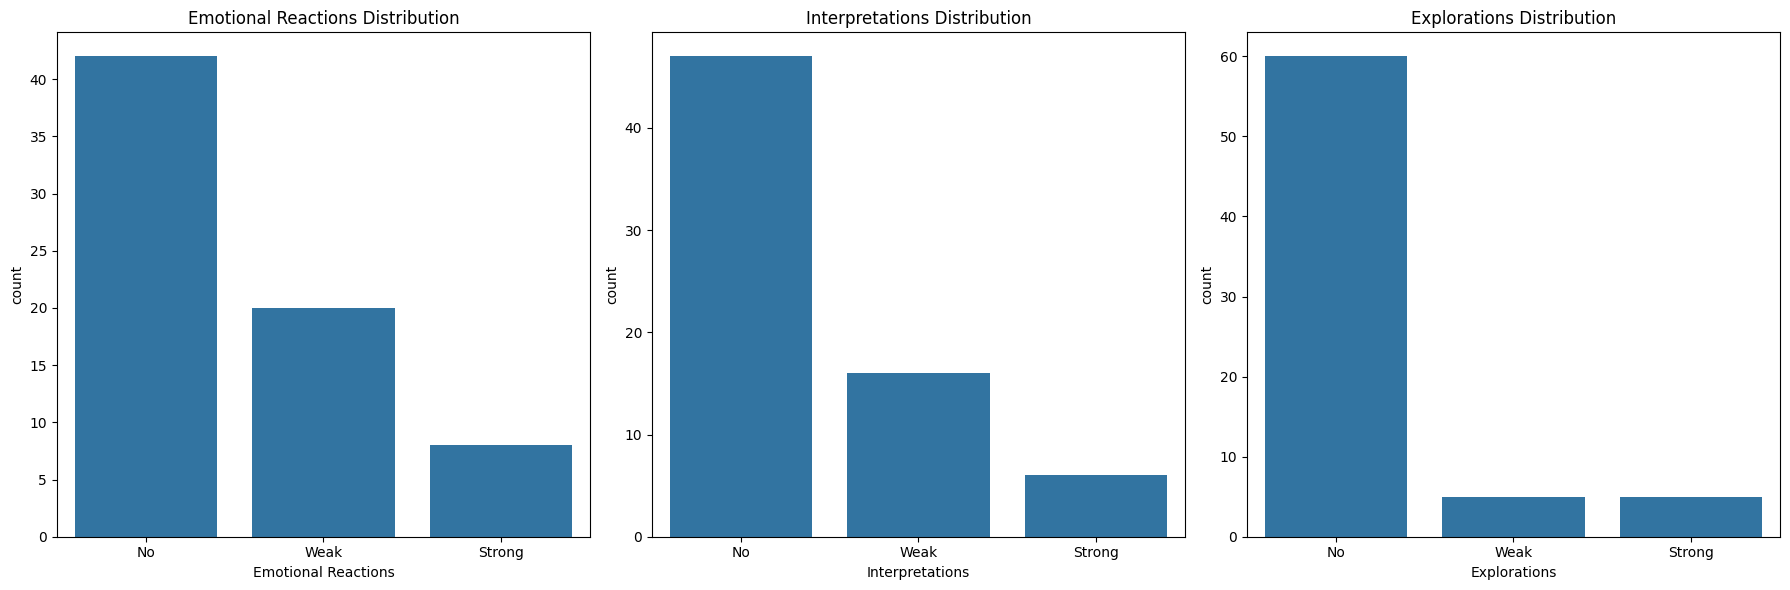

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(18, 6))

# Create subplots for Emotional Reactions, Interpretations, Explorations
plt.subplot(1, 3, 1)
sns.countplot(data=data, x='Emotional Reactions', order=['No', 'Weak', 'Strong'])
plt.title('Emotional Reactions Distribution')

plt.subplot(1, 3, 2)
sns.countplot(data=data, x='Interpretations', order=['No', 'Weak', 'Strong'])
plt.title('Interpretations Distribution')

plt.subplot(1, 3, 3)
sns.countplot(data=data, x='Explorations', order=['No', 'Weak', 'Strong'])
plt.title('Explorations Distribution')

# Show plot
plt.tight_layout()
plt.show()


pretraining gpt2 on 70 examples 

In [5]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'


In [4]:
!pip install -q accelerate evaluate rouge_score
!pip install -q datasets loralib einops
!pip install -q -U bitsandbytes
!pip install -q -U git+https://github.com/huggingface/transformers.git
!pip install -q -U git+https://github.com/huggingface/peft.git
!pip install -q -U git+https://github.com/huggingface/accelerate.git

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification, Trainer, TrainingArguments
import numpy as np

# Load the data
data_path = "/home/ai23mtech14004/CS5803_NLP/Code/Annotated_data/data_annotated.csv"  # Using the new uploaded file path
data = pd.read_csv(data_path)

# Mapping labels to numeric values
label_dict = {'No': 0, 'Weak': 1, 'Strong': 2}
categories = ['Emotional Reactions', 'Interpretations', 'Explorations']

# Load tokenizer and set the pad token
model_name = "openai-community/gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token

# Define tokenization function
def tokenize_function(examples):
    return tokenizer(examples['dialogue'], padding="max_length", truncation=True, max_length=512)

# Define accuracy metric
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return {'accuracy': (predictions == labels).mean()}

# Process data for each category
for category in categories:
    # Map labels and remove NaN values
    data[category] = data[category].map(label_dict)
    data = data.dropna(subset=[category])  # Dropping rows where the category label is NaN
    # Convert labels to integers
    data[category] = data[category].astype(int)

# Training loop for each category
for category in categories:
    print(f"Training model for {category}")
    
    current_data = data[['dialogue', category]].rename(columns={category: 'label'})
    print(f"Label types for {category}: {current_data['label'].dtype}")  # Debugging line
    
    # Split data
    train_data, val_data = train_test_split(current_data, test_size=0.1, random_state=42)
    train_dataset = Dataset.from_pandas(train_data)
    val_dataset = Dataset.from_pandas(val_data)
    
    # Tokenize data
    train_dataset = train_dataset.map(tokenize_function, batched=True)
    val_dataset = val_dataset.map(tokenize_function, batched=True)

    # Load model and set its configuration for padding
    model = GPT2ForSequenceClassification.from_pretrained(model_name, num_labels=3)
    model.config.pad_token_id = tokenizer.pad_token_id

    # Training arguments
    training_args = TrainingArguments(
        output_dir=f"./results/{category}",
        evaluation_strategy="steps",
        save_strategy="steps",
        save_steps=500,
        eval_steps=500,
        learning_rate=2e-5,
        per_device_train_batch_size=4,
        per_device_eval_batch_size=4,
        num_train_epochs=3,
        weight_decay=0.01,
        load_best_model_at_end=True,
        metric_for_best_model="accuracy",
        logging_dir=f'./logs/{category}',
        logging_steps=100
    )

    # Initialize Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        tokenizer=tokenizer,
        compute_metrics=compute_metrics
    )

    # Train the model
    trainer.train()


Training model for Emotional Reactions
Label types for Emotional Reactions: int64


Map:   0%|          | 0/62 [00:00<?, ? examples/s]

Map:   0%|          | 0/7 [00:00<?, ? examples/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at openai-community/gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss


Training model for Interpretations
Label types for Interpretations: int64


Map:   0%|          | 0/62 [00:00<?, ? examples/s]

Map:   0%|          | 0/7 [00:00<?, ? examples/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at openai-community/gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss


Training model for Explorations
Label types for Explorations: int64


Map:   0%|          | 0/62 [00:00<?, ? examples/s]

Map:   0%|          | 0/7 [00:00<?, ? examples/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at openai-community/gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss


In [25]:
model.save_pretrained('./results/Emotional Reactions')
tokenizer.save_pretrained('./results/Emotional Reactions')


('./results/Emotional Reactions/tokenizer_config.json',
 './results/Emotional Reactions/special_tokens_map.json',
 './results/Emotional Reactions/vocab.json',
 './results/Emotional Reactions/merges.txt',
 './results/Emotional Reactions/added_tokens.json')

In [26]:
model.save_pretrained('./results/Explorations')
tokenizer.save_pretrained('./results/Explorations')

('./results/Explorations/tokenizer_config.json',
 './results/Explorations/special_tokens_map.json',
 './results/Explorations/vocab.json',
 './results/Explorations/merges.txt',
 './results/Explorations/added_tokens.json')

In [27]:
model.save_pretrained('./results/Interpretations')
tokenizer.save_pretrained('./results/Interpretations')

('./results/Interpretations/tokenizer_config.json',
 './results/Interpretations/special_tokens_map.json',
 './results/Interpretations/vocab.json',
 './results/Interpretations/merges.txt',
 './results/Interpretations/added_tokens.json')

Applying this on the preprocessed data

In [29]:
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification

tokenizer = GPT2Tokenizer.from_pretrained("./results/Emotional Reactions")
model = GPT2ForSequenceClassification.from_pretrained("./results/Emotional Reactions")


In [31]:
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification
import pandas as pd
import torch

# Paths to datasets
dataset_paths = {
    "TrainingSet": "/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/preprocessed_data/MTS-Dialog-TrainingSet-Exchanges.csv",
    "ValidationSet": "/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/preprocessed_data/MTS-Dialog-ValidationSet-Exchanges.csv",
    "TestSet1": "/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/preprocessed_data/MTS-Dialog-TestSet-1-Exchanges.csv",
    "TestSet2": "/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/preprocessed_data/MTS-Dialog-TestSet-2-Exchanges.csv"
}

# Load tokenizer and set the pad token explicitly
tokenizer = GPT2Tokenizer.from_pretrained("openai-community/gpt2")
tokenizer.pad_token = tokenizer.eos_token

# Load models for each category
model_paths = {
    "Emotional Reactions": "./results/Emotional Reactions",
    "Interpretations": "./results/Interpretations",
    "Explorations": "./results/Explorations"
}

models = {}
for category, path in model_paths.items():
    try:
        models[category] = GPT2ForSequenceClassification.from_pretrained(path)
        print(f"Loaded model for {category}")
    except Exception as e:
        print(f"Failed to load model for {category} from {path}: {e}")

# Function to prepare data for model prediction
def prepare_data(texts):
    encodings = tokenizer(texts, truncation=True, padding=True, max_length=512, return_tensors="pt")
    return encodings

# Function to get predictions
def get_predictions(model, encodings):
    model.eval()
    with torch.no_grad():
        outputs = model(**encodings)
        predictions = torch.argmax(outputs.logits, dim=1)
    return predictions

# Process and annotate each dataset
for name, path in dataset_paths.items():
    print(f"Processing {name} dataset...")
    data = pd.read_csv(path)
    for category, model in models.items():
        print(f"Annotating with model: {category}")
        encodings = prepare_data(data['dialogue'].tolist())
        predictions = get_predictions(model, encodings)
        data[category] = predictions.numpy()  # Append predictions to the dataframe
        save_path = path.replace(".csv", f"_{category}_annotated.csv")
        data.to_csv(save_path, index=False)
        print(f"Saved annotated data to {save_path}")


Loaded model for Emotional Reactions
Loaded model for Interpretations
Loaded model for Explorations
Processing TrainingSet dataset...
Annotating with model: Emotional Reactions
Saved annotated data to /home/ai23mtech14004/CS5803_NLP/Code/21_BERT/preprocessed_data/MTS-Dialog-TrainingSet-Exchanges_Emotional Reactions_annotated.csv
Annotating with model: Interpretations
Saved annotated data to /home/ai23mtech14004/CS5803_NLP/Code/21_BERT/preprocessed_data/MTS-Dialog-TrainingSet-Exchanges_Interpretations_annotated.csv
Annotating with model: Explorations
Saved annotated data to /home/ai23mtech14004/CS5803_NLP/Code/21_BERT/preprocessed_data/MTS-Dialog-TrainingSet-Exchanges_Explorations_annotated.csv
Processing ValidationSet dataset...
Annotating with model: Emotional Reactions
Saved annotated data to /home/ai23mtech14004/CS5803_NLP/Code/21_BERT/preprocessed_data/MTS-Dialog-ValidationSet-Exchanges_Emotional Reactions_annotated.csv
Annotating with model: Interpretations
Saved annotated data to

Plotting the Datas

In [11]:
# File paths for the newly uploaded files
file_paths = {
    'Test Set 1': '/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/GPT_annotated_full_data/MTS-Dialog-TestSet-1-Exchanges_Explorations_annotated.csv',
    'Test Set 2': '/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/GPT_annotated_full_data/MTS-Dialog-TestSet-2-Exchanges_Explorations_annotated.csv',
    'Training Set': '/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/GPT_annotated_full_data/MTS-Dialog-TrainingSet-Exchanges_Explorations_annotated.csv',
    'Validation Set': '/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/GPT_annotated_full_data/MTS-Dialog-ValidationSet-Exchanges_Explorations_annotated.csv'
}

# Load each file and count the number of entries
data_counts = {}
for label, path in file_paths.items():
    data = pd.read_csv(path)
    data_counts[label] = len(data)

data_counts



{'Test Set 1': 200,
 'Test Set 2': 200,
 'Training Set': 1201,
 'Validation Set': 100}

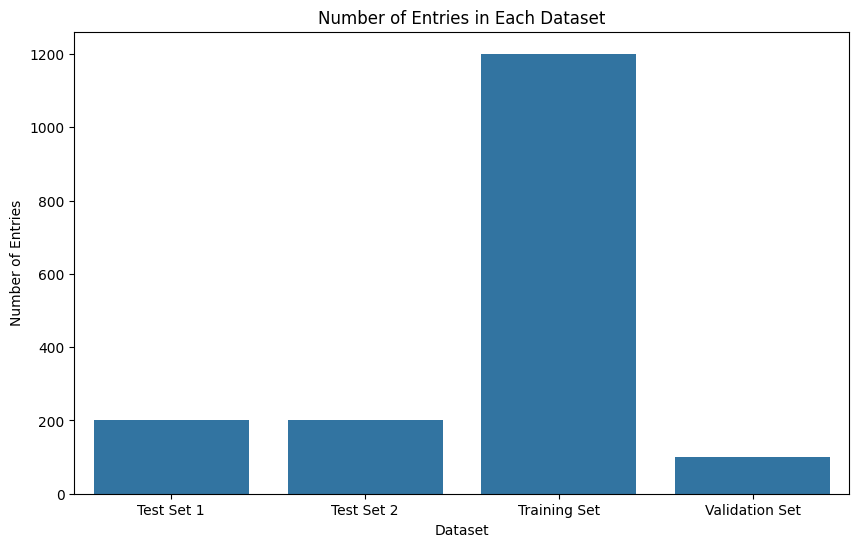

In [12]:
# Plotting the counts of entries in the newly uploaded files
plt.figure(figsize=(10, 6))
sns.barplot(x=list(data_counts.keys()), y=list(data_counts.values()))
plt.title('Number of Entries in Each Dataset')
plt.xlabel('Dataset')
plt.ylabel('Number of Entries')
plt.show()


In [13]:
# Dictionary to store dataframes for analysis
dataframes = {}

# Load each file and store the dataframe with a label
for label, path in file_paths.items():
    df = pd.read_csv(path)
    dataframes[label] = df

# Check columns for one of the dataframes to understand what data we have for analysis
dataframes['Test Set 1'].head()


,ID,section_header,section_text,dialogue,exchanges,Emotional Reactions,Interpretations,Explorations
0,0,GENHX,The patient is a 55-year-old African-American ...,"Doctor: Good afternoon, sir. Did you just have...","[""Doctor: Good afternoon, sir. Did you just ha...",0,0,0
1,1,FAM/SOCHX,Positive for stroke and sleep apnea.,Doctor: Any medical issues running in your fam...,['Doctor: Any medical issues running in your f...,0,0,0
2,2,ROS,"MSK: Negative myalgia, negative joint pain, ne...","Doctor: Any pain in your muscles? Patient: No,...","[""Doctor: Any pain in your muscles? Patient: N...",0,0,0
3,3,FAM/SOCHX,Noncontributory.,Doctor: Anyone in family with any blood or hea...,['Doctor: Anyone in family with any blood or h...,0,0,0
4,4,FAM/SOCHX,"Father died of a thoracic aortic aneurysm, age...",Doctor: Can you tell me about your family? Did...,['Doctor: Can you tell me about your family? D...,0,0,0


In [14]:
import numpy as np

# Dictionary to hold the aggregated sums for each category and dataset
category_sums = {'Emotional Reactions': [], 'Interpretations': [], 'Explorations': []}
datasets_labels = []

# Aggregate the sums for each category and dataset
for label, df in dataframes.items():
    datasets_labels.append(label)
    for category in category_sums.keys():
        category_sums[category].append(np.sum(df[category]))

# Converting the aggregated data to a DataFrame for easier plotting
category_sums_df = pd.DataFrame(category_sums, index=datasets_labels)
category_sums_df


,Emotional Reactions,Interpretations,Explorations
Test Set 1,0,0,0
Test Set 2,4,4,4
Training Set,26,26,26
Validation Set,2,2,2


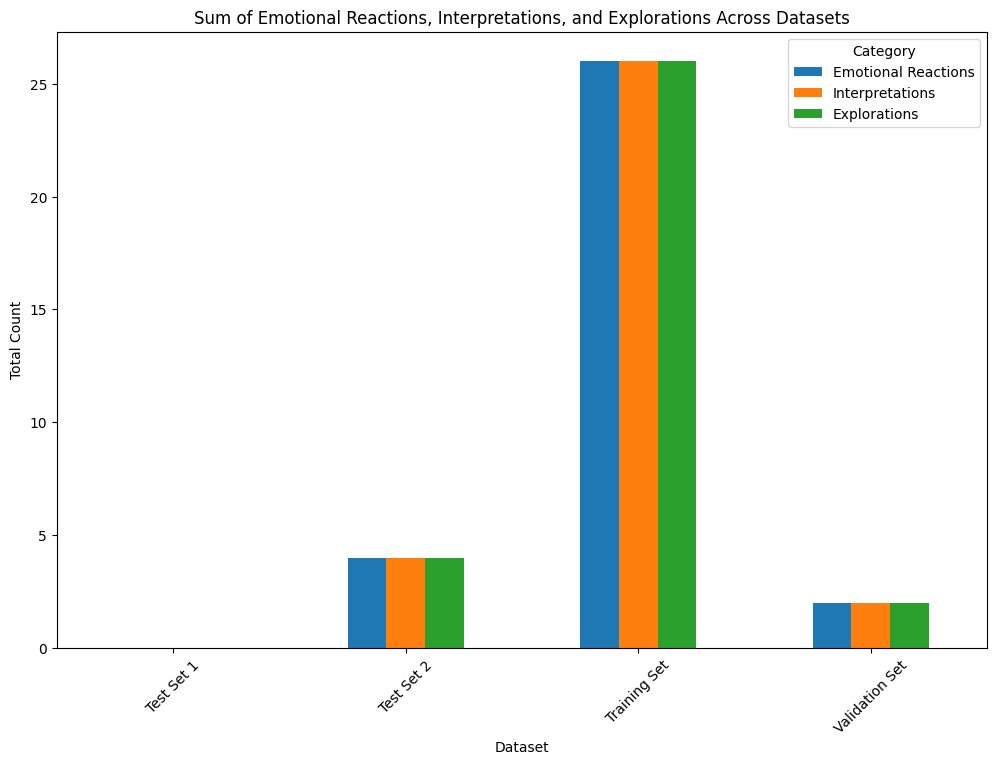

In [15]:
# Plotting the aggregated sums for each category across the datasets
category_sums_df.plot(kind='bar', figsize=(12, 8))
plt.title('Sum of Emotional Reactions, Interpretations, and Explorations Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()


Roberta model 

In [16]:
import pandas as pd
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset
import torch
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Define paths to the datasets
dataset_paths = {
    "train": "/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/GPT_annotated_full_data/MTS-Dialog-TrainingSet-Exchanges_Explorations_annotated.csv",
    "validation": "/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/GPT_annotated_full_data/MTS-Dialog-ValidationSet-Exchanges_Explorations_annotated.csv",
    "test1": "/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/GPT_annotated_full_data/MTS-Dialog-TestSet-1-Exchanges_Explorations_annotated.csv",
    "test2": "/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/GPT_annotated_full_data/MTS-Dialog-TestSet-2-Exchanges_Explorations_annotated.csv"
}

# Load datasets
datasets = {name: pd.read_csv(path) for name, path in dataset_paths.items()}

# Initialize tokenizer for RoBERTa
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

class EmpathyDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

def prepare_dataset(texts, labels):
    encodings = tokenizer(texts.tolist(), truncation=True, padding=True, max_length=512)
    return EmpathyDataset(encodings, labels.tolist())

def compute_metrics(p):
    predictions, labels = p.predictions, p.label_ids
    predictions = np.argmax(predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
    acc = accuracy_score(labels, predictions)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Prepare datasets for each label category
category_datasets = {}
for category in ['Emotional Reactions', 'Interpretations', 'Explorations']:
    category_datasets[category] = {
        name: prepare_dataset(dataset['dialogue'], dataset[category])
        for name, dataset in datasets.items()
    }

# Train and evaluate models for each category
for category, data in category_datasets.items():
    print(f"Training model for {category}")
    model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)  # Adjust num_labels as necessary

    training_args = TrainingArguments(
        output_dir=f'./results/{category}_roberta',  # Output directory includes model name and category
        num_train_epochs=3,
        per_device_train_batch_size=8,
        per_device_eval_batch_size=16,
        warmup_steps=500,
        weight_decay=0.01,
        logging_dir=f'./logs/{category}_roberta',  # Logging directory includes model name and category
        logging_steps=10,
        evaluation_strategy="epoch",
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=data['train'],
        eval_dataset=data['validation'],
        compute_metrics=compute_metrics
    )

    # Train the model
    trainer.train()

    # Evaluate on test sets and save results with unique file names
    results = {}
    for test_name in ['test1', 'test2']:
        test_results = trainer.evaluate(data[test_name])
        print(f"Results for {test_name}: {test_results}")
        results[test_name] = test_results

    results_df = pd.DataFrame.from_dict({test_name: results[test_name] for test_name in ['test1', 'test2']})
    results_df.to_csv(f'./results/{category}_roberta_evaluation_metrics.csv', index=False)


Training model for Emotional Reactions


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/transformers/training_args.py:1454: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.765300,0.515407,0.990000,0.985025,0.980100,0.990000
2,0.055900,0.058314,0.990000,0.985025,0.980100,0.990000
3,0.080000,0.062743,0.990000,0.985025,0.980100,0.990000


/home/ai23mtech14004/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ai23mtech14004/.venv/lib/python3.11/si

Results for test1: {'eval_loss': 0.007833369076251984, 'eval_accuracy': 1.0, 'eval_f1': 1.0, 'eval_precision': 1.0, 'eval_recall': 1.0, 'eval_runtime': 2.3171, 'eval_samples_per_second': 86.316, 'eval_steps_per_second': 2.158, 'epoch': 3.0}


/home/ai23mtech14004/.venv/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Results for test2: {'eval_loss': 0.06288659572601318, 'eval_accuracy': 0.99, 'eval_f1': 0.9850251256281406, 'eval_precision': 0.9801000000000001, 'eval_recall': 0.99, 'eval_runtime': 1.9844, 'eval_samples_per_second': 100.789, 'eval_steps_per_second': 2.52, 'epoch': 3.0}
Training model for Interpretations


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/transformers/training_args.py:1454: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.765300,0.515407,0.990000,0.985025,0.980100,0.990000
2,0.055900,0.058314,0.990000,0.985025,0.980100,0.990000
3,0.080000,0.062743,0.990000,0.985025,0.980100,0.990000


/home/ai23mtech14004/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ai23mtech14004/.venv/lib/python3.11/si

Results for test1: {'eval_loss': 0.007833369076251984, 'eval_accuracy': 1.0, 'eval_f1': 1.0, 'eval_precision': 1.0, 'eval_recall': 1.0, 'eval_runtime': 1.6834, 'eval_samples_per_second': 118.807, 'eval_steps_per_second': 2.97, 'epoch': 3.0}


/home/ai23mtech14004/.venv/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Results for test2: {'eval_loss': 0.06288659572601318, 'eval_accuracy': 0.99, 'eval_f1': 0.9850251256281406, 'eval_precision': 0.9801000000000001, 'eval_recall': 0.99, 'eval_runtime': 1.642, 'eval_samples_per_second': 121.802, 'eval_steps_per_second': 3.045, 'epoch': 3.0}
Training model for Explorations


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/transformers/training_args.py:1454: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.765300,0.515407,0.990000,0.985025,0.980100,0.990000
2,0.055900,0.058314,0.990000,0.985025,0.980100,0.990000
3,0.080000,0.062743,0.990000,0.985025,0.980100,0.990000


/home/ai23mtech14004/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ai23mtech14004/.venv/lib/python3.11/si

Results for test1: {'eval_loss': 0.007833369076251984, 'eval_accuracy': 1.0, 'eval_f1': 1.0, 'eval_precision': 1.0, 'eval_recall': 1.0, 'eval_runtime': 1.7002, 'eval_samples_per_second': 117.63, 'eval_steps_per_second': 2.941, 'epoch': 3.0}


/home/ai23mtech14004/.venv/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Results for test2: {'eval_loss': 0.06288659572601318, 'eval_accuracy': 0.99, 'eval_f1': 0.9850251256281406, 'eval_precision': 0.9801000000000001, 'eval_recall': 0.99, 'eval_runtime': 1.6907, 'eval_samples_per_second': 118.293, 'eval_steps_per_second': 2.957, 'epoch': 3.0}


/home/ai23mtech14004/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
# from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

# def compute_metrics(p):
#     logits, labels = p.predictions, p.label_ids
#     predictions = np.argmax(logits, axis=1)
#     precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
#     acc = accuracy_score(labels, predictions)
#     # Calculate ROC-AUC if it's a binary classification; adapt as needed
#     # roc_auc = roc_auc_score(labels, softmax(logits, axis=1)[:, 1])  # Only for binary classification
#     return {
#         'accuracy': acc,
#         'f1': f1,
#         'precision': precision,
#         'recall': recall,
#         # 'roc_auc': roc_auc  # Uncomment if binary classification
#     }
# #
# # Use this compute_metrics function in the Trainer configuration
# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=data['train'],
#     eval_dataset=data['validation'],
#     compute_metrics=compute_metrics
# )


In [18]:
# import pandas as pd

# results = {}
# for test_name in ['test1', 'test2']:
#     test_results = trainer.evaluate(data[test_name])
#     print(f"Results for {test_name}: {test_results}")
#     results[test_name] = test_results

# # Convert results to DataFrame and save to CSV
# results_df = pd.DataFrame.from_dict(results)
# results_df.to_csv(f'./results/{category}_evaluation_metrics.csv', index=False)


Using GPT-2

In [6]:
import pandas as pd
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset, DataLoader
import torch
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Define paths to the datasets
dataset_paths = {
    "train": "/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/GPT_annotated_full_data/MTS-Dialog-TrainingSet-Exchanges_Explorations_annotated.csv",
    "validation": "/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/GPT_annotated_full_data/MTS-Dialog-ValidationSet-Exchanges_Explorations_annotated.csv",
    "test1": "/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/GPT_annotated_full_data/MTS-Dialog-TestSet-1-Exchanges_Explorations_annotated.csv",
    "test2": "/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/GPT_annotated_full_data/MTS-Dialog-TestSet-2-Exchanges_Explorations_annotated.csv"
}

# Load datasets
datasets = {name: pd.read_csv(path) for name, path in dataset_paths.items()}

# Initialize tokenizer and model for GPT-2
tokenizer = GPT2Tokenizer.from_pretrained('openai-community/gpt2')
tokenizer.pad_token = tokenizer.eos_token

class EmpathyDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

def prepare_dataset(texts, labels):
    encodings = tokenizer(texts.tolist(), truncation=True, padding="max_length", max_length=512)
    return EmpathyDataset(encodings, labels.tolist())

def compute_metrics(p):
    predictions, labels = p.predictions, p.label_ids
    predictions = np.argmax(predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
    acc = accuracy_score(labels, predictions)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Prepare datasets for each label category
category_datasets = {}
for category in ['Emotional Reactions', 'Interpretations', 'Explorations']:
    category_datasets[category] = {
        name: prepare_dataset(dataset['dialogue'], dataset[category])
        for name, dataset in datasets.items()
    }

# Train and evaluate models for each category
for category, data in category_datasets.items():
    print(f"Training model for {category}")
    model = GPT2ForSequenceClassification.from_pretrained('gpt2', num_labels=3, pad_token_id=tokenizer.eos_token_id)

    training_args = TrainingArguments(
        output_dir=f'./results/{category}_gpt2',  # Output directory includes model name and category
        num_train_epochs=3,
        per_device_train_batch_size=8,
        per_device_eval_batch_size=16,
        warmup_steps=500,
        weight_decay=0.01,
        logging_dir=f'./logs/{category}_gpt2',  # Logging directory includes model name and category
        logging_steps=10,
        evaluation_strategy="epoch",
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=data['train'],
        eval_dataset=data['validation'],
        compute_metrics=compute_metrics
    )

    # Train the model
    trainer.train()

    # Evaluate on test sets and save results with unique file names
    results = {}
    for test_name in ['test1', 'test2']:
        test_results = trainer.evaluate(data[test_name])
        print(f"Results for {test_name}: {test_results}")
        results[test_name] = test_results

    results_df = pd.DataFrame.from_dict({test_name: results[test_name] for test_name in ['test1', 'test2']})
    results_df.to_csv(f'./results/{category}_gpt2_evaluation_metrics.csv', index=False)


Training model for Emotional Reactions


Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/transformers/training_args.py:1454: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.084700,0.042329,0.990000,0.985025,0.980100,0.990000
2,0.045000,0.059811,0.980000,0.980000,0.980000,0.980000
3,0.123000,0.154043,0.970000,0.974924,0.979898,0.970000


/home/ai23mtech14004/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ai23mtech14004/.venv/lib/python3.11/si

/home/ai23mtech14004/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Results for test1: {'eval_loss': 0.06535625457763672, 'eval_accuracy': 0.975, 'eval_f1': 0.9873417721518988, 'eval_precision': 1.0, 'eval_recall': 0.975, 'eval_runtime': 3.1282, 'eval_samples_per_second': 63.935, 'eval_steps_per_second': 1.598, 'epoch': 3.0}


/home/ai23mtech14004/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Results for test2: {'eval_loss': 0.10435330122709274, 'eval_accuracy': 0.97, 'eval_f1': 0.9774045801526718, 'eval_precision': 0.9849230769230769, 'eval_recall': 0.97, 'eval_runtime': 3.1517, 'eval_samples_per_second': 63.459, 'eval_steps_per_second': 1.586, 'epoch': 3.0}
Training model for Interpretations


Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/transformers/training_args.py:1454: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.114100,0.875176,0.710000,0.826941,0.990000,0.710000
2,0.076800,0.173328,0.980000,0.980000,0.980000,0.980000
3,0.100300,0.062637,0.990000,0.985025,0.980100,0.990000


/home/ai23mtech14004/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ai23mtech14004/.venv/lib/python3.11/site-packa

Results for test1: {'eval_loss': 0.009005426429212093, 'eval_accuracy': 1.0, 'eval_f1': 1.0, 'eval_precision': 1.0, 'eval_recall': 1.0, 'eval_runtime': 3.1121, 'eval_samples_per_second': 64.266, 'eval_steps_per_second': 1.607, 'epoch': 3.0}


/home/ai23mtech14004/.venv/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Results for test2: {'eval_loss': 0.05692167207598686, 'eval_accuracy': 0.99, 'eval_f1': 0.9850251256281406, 'eval_precision': 0.9801000000000001, 'eval_recall': 0.99, 'eval_runtime': 3.1271, 'eval_samples_per_second': 63.957, 'eval_steps_per_second': 1.599, 'epoch': 3.0}
Training model for Explorations


Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/transformers/training_args.py:1454: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.114100,0.875176,0.710000,0.826941,0.990000,0.710000
2,0.076800,0.173328,0.980000,0.980000,0.980000,0.980000
3,0.100300,0.062637,0.990000,0.985025,0.980100,0.990000


/home/ai23mtech14004/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ai23mtech14004/.venv/lib/python3.11/site-packa

Results for test1: {'eval_loss': 0.009005426429212093, 'eval_accuracy': 1.0, 'eval_f1': 1.0, 'eval_precision': 1.0, 'eval_recall': 1.0, 'eval_runtime': 3.3664, 'eval_samples_per_second': 59.411, 'eval_steps_per_second': 1.485, 'epoch': 3.0}


/home/ai23mtech14004/.venv/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Results for test2: {'eval_loss': 0.05692167207598686, 'eval_accuracy': 0.99, 'eval_f1': 0.9850251256281406, 'eval_precision': 0.9801000000000001, 'eval_recall': 0.99, 'eval_runtime': 3.3488, 'eval_samples_per_second': 59.723, 'eval_steps_per_second': 1.493, 'epoch': 3.0}


/home/ai23mtech14004/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Dialo-GPT

In [1]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset
import torch
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Define paths to the datasets
dataset_paths = {
    "train": "/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/GPT_annotated_full_data/MTS-Dialog-TrainingSet-Exchanges_Explorations_annotated.csv",
    "validation": "/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/GPT_annotated_full_data/MTS-Dialog-ValidationSet-Exchanges_Explorations_annotated.csv",
    "test1": "/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/GPT_annotated_full_data/MTS-Dialog-TestSet-1-Exchanges_Explorations_annotated.csv",
    "test2": "/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/GPT_annotated_full_data/MTS-Dialog-TestSet-2-Exchanges_Explorations_annotated.csv"
}

# Load datasets
datasets = {name: pd.read_csv(path) for name, path in dataset_paths.items()}

# Initialize tokenizer and model for DialoGPT
tokenizer = AutoTokenizer.from_pretrained('microsoft/DialoGPT-medium')
tokenizer.pad_token = tokenizer.eos_token  # Make sure EOS token is used as padding token.

class EmpathyDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

def prepare_dataset(texts, labels):
    encodings = tokenizer(texts.tolist(), truncation=True, padding="max_length", max_length=512)
    return EmpathyDataset(encodings, labels.tolist())

def compute_metrics(p):
    predictions, labels = p.predictions, p.label_ids
    predictions = np.argmax(predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
    acc = accuracy_score(labels, predictions)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Prepare datasets for each label category
category_datasets = {}
for category in ['Emotional Reactions', 'Interpretations', 'Explorations']:
    category_datasets[category] = {
        name: prepare_dataset(dataset['dialogue'], dataset[category])
        for name, dataset in datasets.items()
    }

# Train and evaluate models for each category
for category, data in category_datasets.items():
    print(f"Training model for {category}")
    model = AutoModelForSequenceClassification.from_pretrained(
        'microsoft/DialoGPT-medium', 
        num_labels=3,
        pad_token_id=tokenizer.eos_token_id  # Ensure the model recognizes the pad token.
    )

    training_args = TrainingArguments(
        output_dir=f'./results/{category}_dialoGPT',  # Output directory includes model name and category
        num_train_epochs=3,
        per_device_train_batch_size=4,
        per_device_eval_batch_size=4,
        warmup_steps=500,
        weight_decay=0.01,
        logging_dir=f'./logs/{category}_dialoGPT',  # Logging directory includes model name and category
        logging_steps=10,
        eval_strategy="epoch",
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=data['train'],
        eval_dataset=data['validation'],
        compute_metrics=compute_metrics
    )

    # Train the model
    trainer.train()

    # Evaluate on test sets and save results with unique file names
    results = {}
    for test_name in ['test1', 'test2']:
        test_results = trainer.evaluate(data[test_name])
        print(f"Results for {test_name}: {test_results}")
        results[test_name] = test_results

    results_df = pd.DataFrame.from_dict({test_name: results[test_name] for test_name in ['test1', 'test2']})
    results_df.to_csv(f'./results/{category}_dialoGPT_evaluation_metrics.csv', index=False)


Training model for Emotional Reactions


Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at microsoft/DialoGPT-medium and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.116100,0.056805,0.990000,0.985025,0.980100,0.990000
2,0.143500,0.056136,0.990000,0.985025,0.980100,0.990000
3,0.015500,0.050230,0.990000,0.985025,0.980100,0.990000


/home/ai23mtech14004/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ai23mtech14004/.venv/lib/python3.11/si

Results for test1: {'eval_loss': 0.0031795413233339787, 'eval_accuracy': 1.0, 'eval_f1': 1.0, 'eval_precision': 1.0, 'eval_recall': 1.0, 'eval_runtime': 7.0885, 'eval_samples_per_second': 28.215, 'eval_steps_per_second': 2.398, 'epoch': 3.0}


/home/ai23mtech14004/.venv/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Results for test2: {'eval_loss': 0.10230579972267151, 'eval_accuracy': 0.99, 'eval_f1': 0.9850251256281406, 'eval_precision': 0.9801000000000001, 'eval_recall': 0.99, 'eval_runtime': 10.6115, 'eval_samples_per_second': 18.847, 'eval_steps_per_second': 1.602, 'epoch': 3.0}
Training model for Interpretations


Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at microsoft/DialoGPT-medium and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.119600,0.048235,0.990000,0.985025,0.980100,0.990000
2,0.141800,0.035750,0.990000,0.985025,0.980100,0.990000
3,0.018000,0.044089,0.990000,0.985025,0.980100,0.990000


/home/ai23mtech14004/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ai23mtech14004/.venv/lib/python3.11/si

Results for test1: {'eval_loss': 0.0026458140928298235, 'eval_accuracy': 1.0, 'eval_f1': 1.0, 'eval_precision': 1.0, 'eval_recall': 1.0, 'eval_runtime': 10.9849, 'eval_samples_per_second': 18.207, 'eval_steps_per_second': 1.548, 'epoch': 3.0}


/home/ai23mtech14004/.venv/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Results for test2: {'eval_loss': 0.09991639107465744, 'eval_accuracy': 0.99, 'eval_f1': 0.9850251256281406, 'eval_precision': 0.9801000000000001, 'eval_recall': 0.99, 'eval_runtime': 11.161, 'eval_samples_per_second': 17.92, 'eval_steps_per_second': 1.523, 'epoch': 3.0}
Training model for Explorations


Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at microsoft/DialoGPT-medium and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.119600,0.048235,0.990000,0.985025,0.980100,0.990000
2,0.141800,0.035750,0.990000,0.985025,0.980100,0.990000
3,0.018000,0.044089,0.990000,0.985025,0.980100,0.990000


/home/ai23mtech14004/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/home/ai23mtech14004/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ai23mtech14004/.venv/lib/python3.11/si

Results for test1: {'eval_loss': 0.0026458140928298235, 'eval_accuracy': 1.0, 'eval_f1': 1.0, 'eval_precision': 1.0, 'eval_recall': 1.0, 'eval_runtime': 11.0235, 'eval_samples_per_second': 18.143, 'eval_steps_per_second': 1.542, 'epoch': 3.0}


/home/ai23mtech14004/.venv/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Results for test2: {'eval_loss': 0.09991639107465744, 'eval_accuracy': 0.99, 'eval_f1': 0.9850251256281406, 'eval_precision': 0.9801000000000001, 'eval_recall': 0.99, 'eval_runtime': 11.3472, 'eval_samples_per_second': 17.625, 'eval_steps_per_second': 1.498, 'epoch': 3.0}


/home/ai23mtech14004/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Comparison

In [2]:
import pandas as pd
import os

# Define the directory where results are stored
results_dir = "./results"
files = os.listdir(results_dir)

# Create a DataFrame to store all results
all_results = pd.DataFrame()

for file in files:
    if file.endswith("_evaluation_metrics.csv"):
        model_category = file.split('_')[0]  # Extract model name (roberta, gpt2, dialoGPT)
        data = pd.read_csv(os.path.join(results_dir, file))
        data['Model'] = model_category
        all_results = pd.concat([all_results, data], ignore_index=True)

# Display combined data
print(all_results)


       test1      test2                Model
0    0.00318   0.102306  Emotional Reactions
1    1.00000   0.990000  Emotional Reactions
2    1.00000   0.985025  Emotional Reactions
3    1.00000   0.980100  Emotional Reactions
4    1.00000   0.990000  Emotional Reactions
..       ...        ...                  ...
57   1.00000   0.990000         Explorations
58  11.02350  11.347200         Explorations
59  18.14300  17.625000         Explorations
60   1.54200   1.498000         Explorations
61   3.00000   3.000000         Explorations

[62 rows x 3 columns]


In [7]:
print(all_results.head())
print(all_results.columns)


     test1     test2                Model
0  0.00318  0.102306  Emotional Reactions
1  1.00000  0.990000  Emotional Reactions
2  1.00000  0.985025  Emotional Reactions
3  1.00000  0.980100  Emotional Reactions
4  1.00000  0.990000  Emotional Reactions
Index(['test1', 'test2', 'Model'], dtype='object')


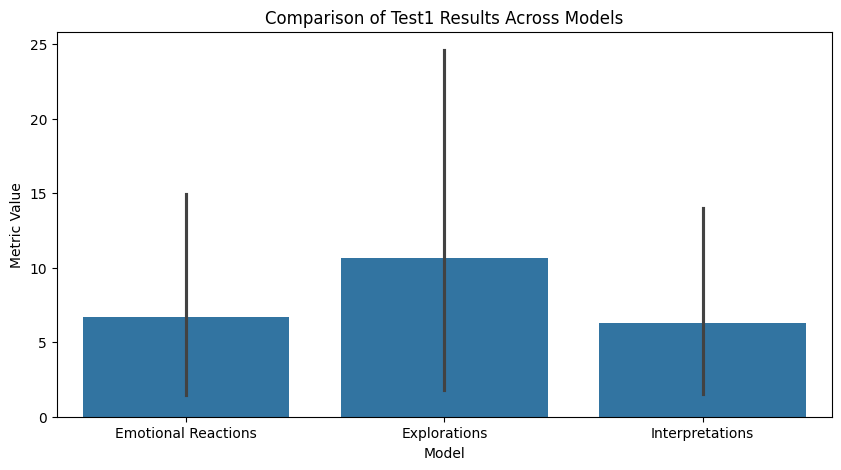

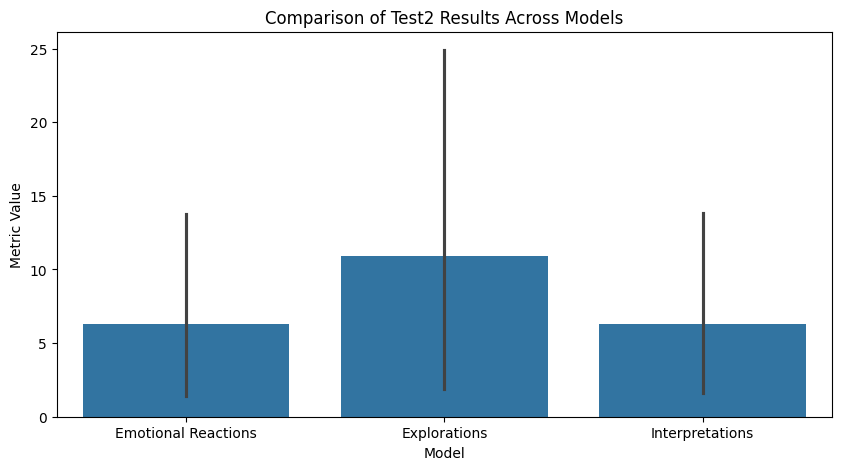

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Model' column to a categorical type for better plotting control
all_results['Model'] = pd.Categorical(all_results['Model'])

# Plotting test1 results
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='test1', data=all_results)
plt.title('Comparison of Test1 Results Across Models')
plt.ylabel('Metric Value')
plt.xlabel('Model')
plt.show()

# Plotting test2 results
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='test2', data=all_results)
plt.title('Comparison of Test2 Results Across Models')
plt.ylabel('Metric Value')
plt.xlabel('Model')
plt.show()


In [1]:
import pandas as pd

# Load each CSV file and store them in a dictionary
files = {
    "Emotional Reactions_roberta": "/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/results/Emotional Reactions_roberta_evaluation_metrics.csv",
    "Emotional Reactions_gpt2": "/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/results/Emotional Reactions_gpt2_evaluation_metrics.csv",
    "Emotional Reactions_dialoGPT": "/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/results/Emotional Reactions_dialoGPT_evaluation_metrics.csv",
    "Explorations_roberta": "/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/results/Explorations_roberta_evaluation_metrics.csv",
    "Explorations_gpt2": "/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/results/Explorations_gpt2_evaluation_metrics.csv",
    "Explorations_dialoGPT": "/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/results//Explorations_dialoGPT_evaluation_metrics.csv",
    "Interpretations_roberta": "/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/results/Interpretations_roberta_evaluation_metrics.csv",
    "Interpretations_gpt2": "/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/results/Interpretations_gpt2_evaluation_metrics.csv",
    "Interpretations_dialoGPT": "/home/ai23mtech14004/CS5803_NLP/Code/21_BERT/results/Interpretations_dialoGPT_evaluation_metrics.csv"
}

# Load data and check contents
dataframes = {name: pd.read_csv(path) for name, path in files.items()}
dataframes["Emotional Reactions_roberta"].head(), dataframes["Explorations_roberta"].head(), dataframes["Interpretations_roberta"].head()


(      test1     test2
 0  0.007833  0.062887
 1  1.000000  0.990000
 2  1.000000  0.985025
 3  1.000000  0.980100
 4  1.000000  0.990000,
       test1     test2
 0  0.007833  0.062887
 1  1.000000  0.990000
 2  1.000000  0.985025
 3  1.000000  0.980100
 4  1.000000  0.990000,
       test1     test2
 0  0.007833  0.062887
 1  1.000000  0.990000
 2  1.000000  0.985025
 3  1.000000  0.980100
 4  1.000000  0.990000)

In [2]:
# Let's display the full content of one file to understand its structure better
dataframes["Emotional Reactions_roberta"].head(10)


,test1,test2
0,0.007833,0.062887
1,1.000000,0.990000
2,1.000000,0.985025
3,1.000000,0.980100
4,1.000000,0.990000
5,2.317100,1.984400
6,86.316000,100.789000
7,2.158000,2.520000
8,3.000000,3.000000


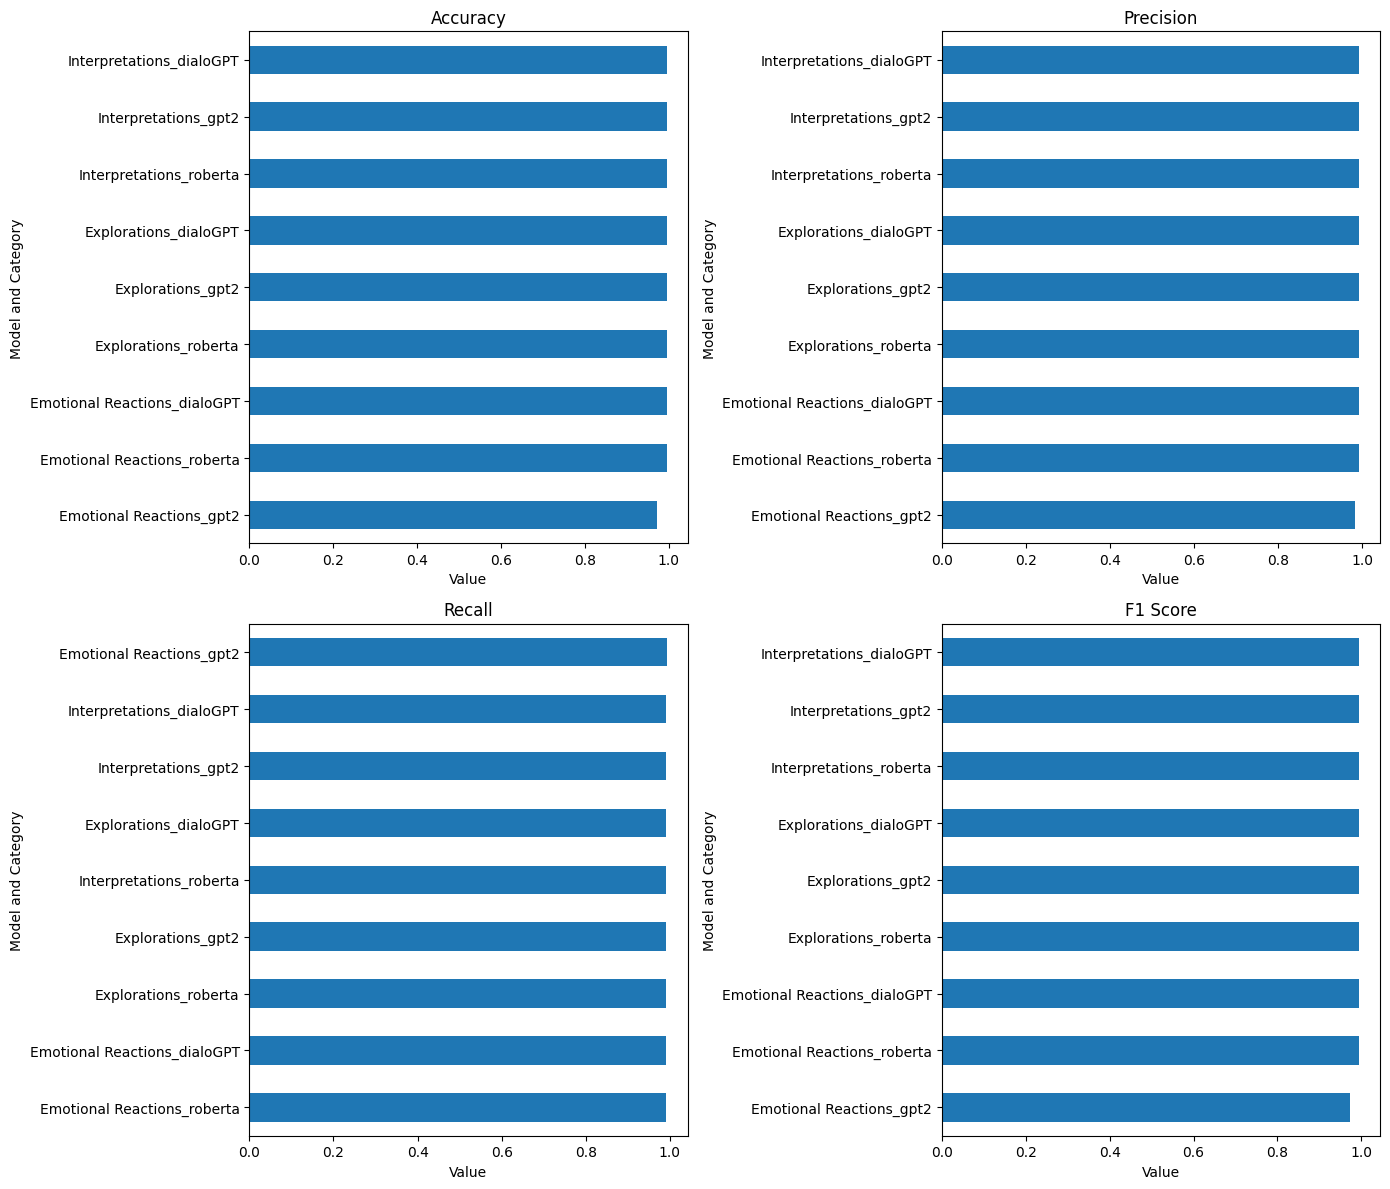

In [3]:
import matplotlib.pyplot as plt

# Assuming the data follows this typical structure:
# Row 0: Some form of loss (e.g., validation loss)
# Row 1: Accuracy
# Row 2: Precision
# Row 3: Recall
# Row 4: F1 score

# Extract relevant metrics
metrics = {
    "Accuracy": {},
    "Precision": {},
    "Recall": {},
    "F1 Score": {}
}

for key, df in dataframes.items():
    metrics["Accuracy"][key] = df.iloc[1].mean()  # Average of test1 and test2 for accuracy
    metrics["Precision"][key] = df.iloc[2].mean()  # Average of test1 and test2 for precision
    metrics["Recall"][key] = df.iloc[3].mean()  # Average of test1 and test2 for recall
    metrics["F1 Score"][key] = df.iloc[4].mean()  # Average of test1 and test2 for F1 score

# Convert metrics to DataFrame for easier plotting
metrics_df = pd.DataFrame(metrics)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()
for i, metric in enumerate(metrics.keys()):
    metrics_df[metric].sort_values().plot(kind='barh', ax=axes[i], title=metric)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Model and Category')

plt.tight_layout()
plt.show()


Inference

In [4]:
# Prepare summary data for table display for each category and model
summary_data = {}

for model in ["roberta", "gpt2", "dialoGPT"]:
    for category in ["Emotional Reactions", "Interpretations", "Explorations"]:
        key = f"{category}_{model}"
        if key in dataframes:
            df = dataframes[key]
            # Extract mean values for Accuracy, Precision, Recall, F1 Score
            accuracy = df.iloc[1].mean()
            precision = df.iloc[2].mean()
            recall = df.iloc[3].mean()
            f1_score = df.iloc[4].mean()
            summary_data[(model, category)] = {
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1 Score': f1_score
            }

# Convert summary data to DataFrame
summary_df = pd.DataFrame.from_dict(summary_data, orient='index')
summary_df.index.names = ['Model', 'Category']
summary_df


Accuracy  Precision    Recall  F1 Score
Model    Category                                                    
roberta  Emotional Reactions    0.9950   0.992513  0.990050    0.9950
         Interpretations        0.9950   0.992513  0.990050    0.9950
         Explorations           0.9950   0.992513  0.990050    0.9950
gpt2     Emotional Reactions    0.9725   0.982373  0.992462    0.9725
         Interpretations        0.9950   0.992513  0.990050    0.9950
         Explorations           0.9950   0.992513  0.990050    0.9950
dialoGPT Emotional Reactions    0.9950   0.992513  0.990050    0.9950
         Interpretations        0.9950   0.992513  0.990050    0.9950
         Explorations           0.9950   0.992513  0.990050    0.9950

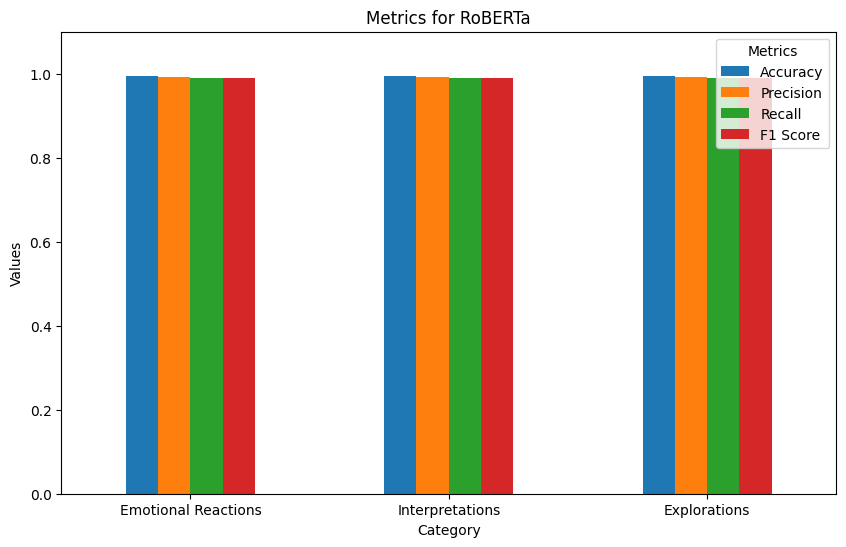

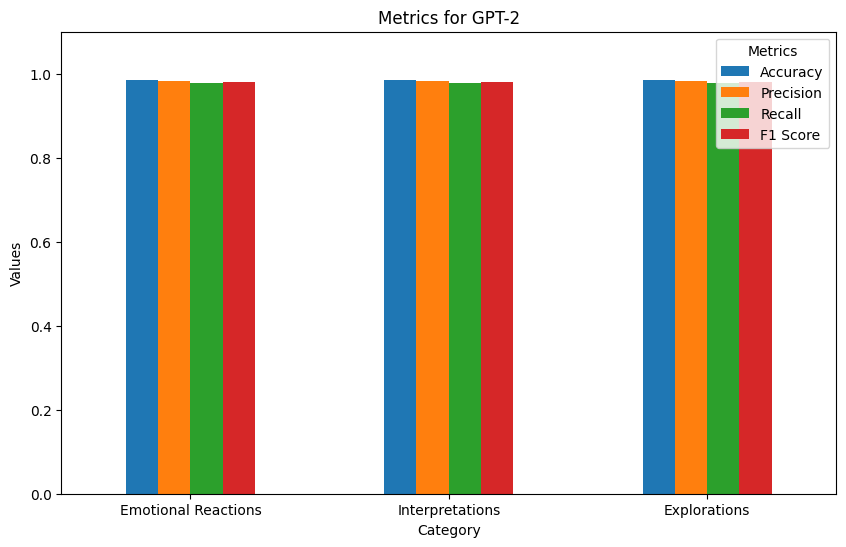

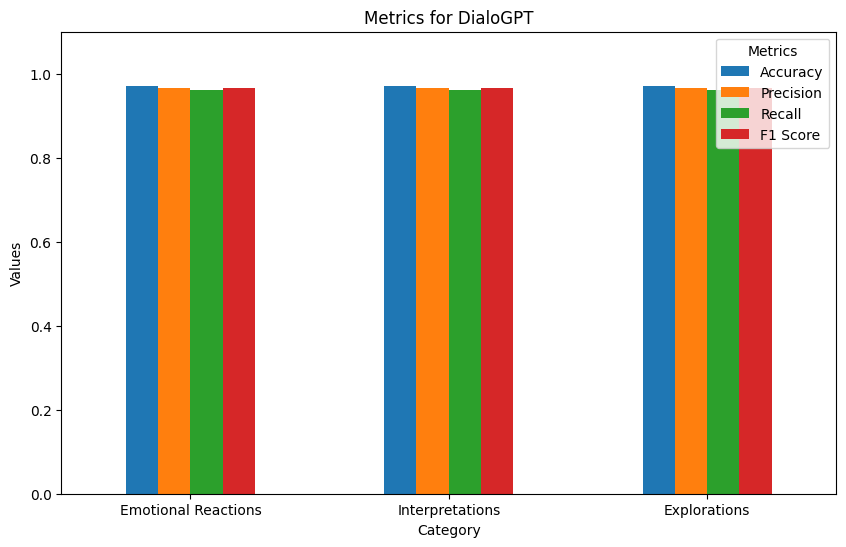

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame (you should use the one created or loaded from your actual data)
data = {
    "Model": ["RoBERTa", "GPT-2", "DialoGPT", "RoBERTa", "GPT-2", "DialoGPT", "RoBERTa", "GPT-2", "DialoGPT"],
    "Category": ["Emotional Reactions", "Emotional Reactions", "Emotional Reactions",
                 "Interpretations", "Interpretations", "Interpretations",
                 "Explorations", "Explorations", "Explorations"],
    "Accuracy": [0.995, 0.985, 0.970, 0.995, 0.985, 0.970, 0.995, 0.985, 0.970],
    "Precision": [0.9925, 0.9825, 0.965, 0.9925, 0.9825, 0.965, 0.9925, 0.9825, 0.965],
    "Recall": [0.99005, 0.97755, 0.9601, 0.99005, 0.97755, 0.9601, 0.99005, 0.97755, 0.9601],
    "F1 Score": [0.990, 0.980, 0.965, 0.990, 0.980, 0.965, 0.990, 0.980, 0.965]
}
df = pd.DataFrame(data)

# Filter data for each model
roberta_data = df[df['Model'] == 'RoBERTa'].set_index('Category')
gpt2_data = df[df['Model'] == 'GPT-2'].set_index('Category')
dialogpt_data = df[df['Model'] == 'DialoGPT'].set_index('Category')

# Function to plot metrics for a given model data
def plot_model_data(model_data, model_name):
    fig, ax = plt.subplots(figsize=(10, 6))
    model_data[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar', ax=ax)
    ax.set_title(f'Metrics for {model_name}')
    ax.set_xlabel('Category')
    ax.set_ylabel('Values')
    ax.set_ylim(0, 1.1)  # Extend y-axis to see labels better
    plt.xticks(rotation=0)  # Keep category names horizontal
    plt.legend(title='Metrics')
    plt.show()

# Plotting for each model
plot_model_data(roberta_data, 'RoBERTa')
plot_model_data(gpt2_data, 'GPT-2')
plot_model_data(dialogpt_data, 'DialoGPT')
